In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

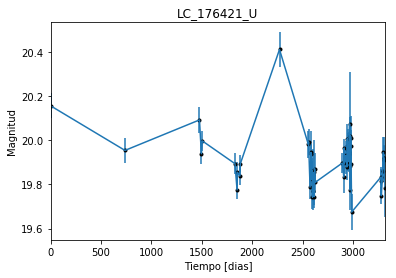

In [2]:
data = np.genfromtxt('LC_176421_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_176421_U')
plt.savefig("LC_176421_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

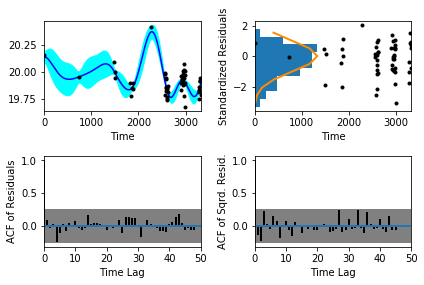

In [5]:
sample.assess_fit()

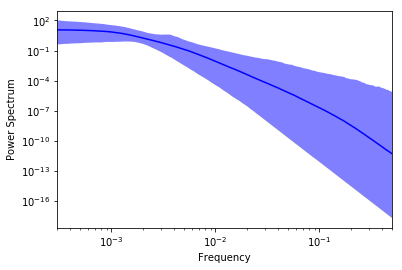

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

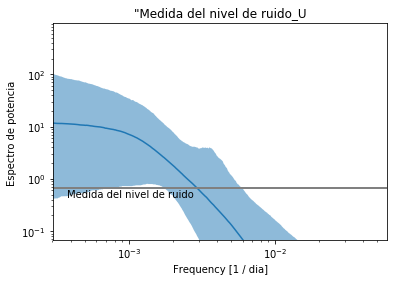

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_176421_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_176421_U')

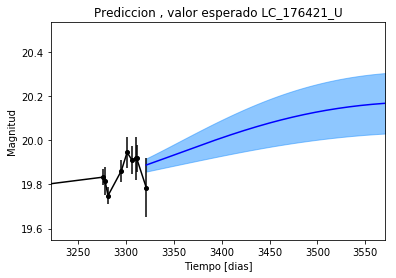

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_176421_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_176421_U')

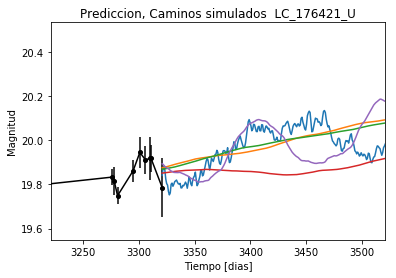

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_176421_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


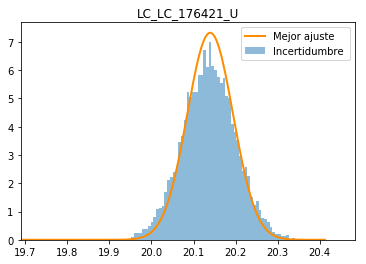

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_LC_176421_U')
plt.savefig("Mejor_ajuste_LC_176421_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_176421_U')

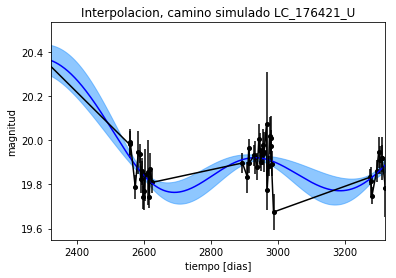

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176421_U')

Text(0.5,1,'Interpolacion, camino simulado LC_176421_U')

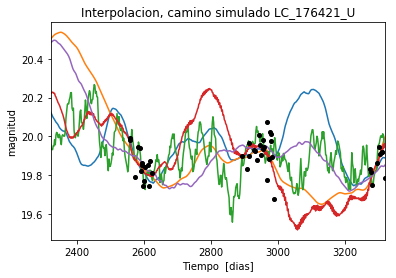

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176421_U')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 896.778674387
Median: 0.00512165423938
Standard deviation: 0.174932277011
68% credibility interval: [ 0.0006395   0.12964906]
95% credibility interval: [  3.41203391e-04   7.15787109e-01]
99% credibility interval: [  3.10399723e-04   9.29901132e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 772.268027748
Median: 0.00190051196403
Standard deviation: 0.0757407934192
68% credibility interval: [ 0.00051289  0.02217207]
95% credibility interval: [ 0.00033279  0.26046148]
99% credibility interval: [  3.08818476e-04   5.13247586e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 776.733091964
Median: 0.0140440673895
Standard

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2026.36370989
Median: 78.8440222151
Standard deviation: 1.69249240249
68% credibility interval: [ 76.95853242  80.08368325]
95% credibility interval: [ 74.37595483  80.99488982]
99% credibility interval: [ 72.42531071  81.39401546]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 392.34068298
Median: 0.543286517789
Standard deviation: 2.18795402481
68% credibility interval: [ 0.04440804  3.99556489]
95% credibility interval: [ 0.01515641  7.40902706]
99% credibility interval: [ 0.01018838  9.65414064]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 786.74848053
Median: 0.335052196376
Standard deviation: 7.87243107063
68% credibility interval: [ 0.00848418  7.50599153]
95% credibility interval: [  3.45321595e-04 

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20019.4326555
Median: 3.72772099238e-33
Standard deviation: 1.56458044035e+103
68% credibility interval: [  5.47731456e-68   5.49386014e-03]
95% credibility interval: [  2.75602552e-145   3.91496878e+068]
99% credibility interval: [  1.98277264e-168   7.52330865e+080]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3222.08678276
Median: 19.9881354143
Standard deviation: 0.0955327770548
68% credibility interval: [ 19.9198044   20.06842607]
95% credibility interval: [ 19.81979709  20.19868403]
99% credibility interval: [ 19.69427554  20.33237697]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 514.235325068
Median: 0.0041738464174
Standard deviation: 0.228360263966
68% credibility interval: [ 0.          0.31969591]
95% credibility interval: [ 0.          0.85271351]
99% credibility interval: [ 0.          0.96766122]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 514.235325068
Median: 0.0041738464174
Standard deviation: 0.228360263966
68% credibility interval: [ 0.          0.31969591]
95% credibility interval: [ 0.          0.85271351]
99% credibility interval: [ 0.          0.96766122]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 904.967876108
Median: 0.0
Standard deviation: 0.000884310816223
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2026.36370989
Median: 78.8440222151
Standard deviation: 1.69249240249
68% credibility interval: [ 76.95853242  80.08368325]
95% credibility interval: [ 74.37595483  80.99488982]
99% credibility interval: [ 72.42531071  81.39401546]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3950.48820765
Median: 0.0375471802525
Standard deviation: 0.0555182078775
68% credibility interval: [ 0.02035591  0.07712778]
95% credibility interval: [ 0.01152788  0.18089151]
99% credibility interval: [ 0.00840524  0.36093391]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2027.94774006
Median: 1.06965663464
Standard deviation: 0.177250878972
68% credibility interval: [ 0.91350499  1.25640299]
95% credibility interval: [ 0.78490098  1.48493378]
99% credibility interval: [ 0.71320829  1.64814904]


In [28]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 4586.44413743
Median: 9.95174578578e-05
Standard deviation: 0.111789471128
68% credibility interval: [  3.73364257e-07   5.56015652e-03]
95% credibility interval: [  1.20450448e-71   2.12507644e-01]
99% credibility interval: [  4.65094510e-86   7.11828116e-01]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 896.778674387
Median: (-0.0321803026654-0.0111781089799j)
Standard deviation: 1.80743676932
68% credibility interval: [-0.81460907-0.79944282j -0.00401807-0.00673607j]
95% credibility interval: [ -4.49742305e+00+0.j         -2.14384413e-03-0.2353566j]
99% credibility interval: [ -5.84274113e+00-5.33808287j  -1.95029898e-03-4.65392885j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 772.268027748
Median: (-0.0119412688485+0.956560479369j)
Standard deviation: 1.51169152946
68% credibility interval: [-0.13931124 +5.03713658e+00j -0.00322257 +1.45013825e-03j]
95% credibility interval: [-1.63652772+2.10461722j -0.00209095+0.00586656j]
99% credibility interval: [ -3.22482969e+00+1.06616534j  -1.94036371e-03+0.02982299j]
Pos